<a href="https://colab.research.google.com/github/almagashi/Problem-Solving-Algorithms/blob/master/Final_Project_Pots_of_Gold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pots of Gold**

## **Define the problem:**

There are n-pots arranged in a line in front of two players. Each pot contains a certain value of coins. Both players are going to play optimally to maximize their profit by following the rules of the game which are: 

> You can either pick a pot from the beginning or the end.

> You must take alternating turns.

 Both players are able to see how many coins are there in each pot. An optimal strategy is one that maximizes one's profit and opponent's loss simultaneously. Although both players will play optimally, we cannot predict with certainty which is our opponent's next move. In this case, the utility of both of the players remains the same (maximum number of coins), but they can choose different strategies to solve this problem. 

 This is a decision-making problem. There are many decisions to be made from both players until there are no pots left. Each decision has the same choices; choose first pot or end pot. If we find an optimal strategy for the first decision we need to make, we can use that strategy for all the other decisions as their structure and choices do not change - it's a repeated problem. Some might go for best choice at hand (maximax behaviour), and some might choose the best choice for the future (minimax behaviour).

 Further we will analyze different types of solutions for the same problem.

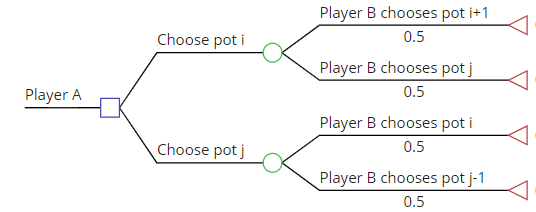

Figure 1. The Pots of Gold game from the Player's A perspective.

[Note: Probabilities will change once we use elements and not indices]

## **Candidate Dynamic Programming solutions:**

Such problems can be solved using Dynamic Programming because there is an overlapping problem and optimal substructure solution.


> **Overlapping problem**: The goal is to maximize your profit. However, this includes that the other player's profit is being minimized. Dynamic Programming provides solutions to tackle both problems simultaneously. 



> **Optimal Substructure:** As mentioned earlier, the problem is a series of decisions which have the same options to choose from. If we find an optimal way to make one of the decisions, then we can apply the same strategy to all the other decisions to be made.

Below, you will find three dynamic programming solutions, from two approaches:

1. **Top-down**: break the problem recursively until we find the optimal solution.
2. **Bottom-up**: solve broken pieces of the problem, save them, and find the best strategy to follow for the next same problems.




### **Top-down approach with  exponential time complexity:**

In [0]:
def optimalStrategy1(coins, i, j):
  '''
  Recursive function to maximize the number of coins collected
  by a player, assuming that opponent also plays optimally

  Input: 

  - coins(list): the number of coins in each pot
  - i,j: index of the list

  Output:

  - Best strategy to play (int): number of coins collected
  '''

  # base case: one pot is left
  if i == j:
      return coins[i]

  # another case: two pots are left
  if (i + 1) == j:
      return max(coins[i], coins[j])

  ### If player A chooses pot i, player B has to choose ###
  ### from [i+1, j]. ###
  # Case 1: if player B chooses pot i+1, player A can choose [i+2, j] 
  # Case 2: if player B chooses pot j, player A can choose [i+1, j-1] 

  start = coins[i] + min(optimalStrategy1(coins, i+2, j),
                        optimalStrategy1(coins, i+1, j-1))
  
  ### If player A chooses pot j, player B has to choose [i, j-1]. ###
  # Case 1: if player B chooses pot i, player A can choose [i+1, j-1] 
  # Case 2: if player B chooses pot j-1, player A can choose [i, j-2]

  end = coins[j] + min(optimalStrategy1(coins, i+1, j-1),
                        optimalStrategy1(coins, i, j-2))
  
  # return maximum of two choices
  return max(start, end)


####**Computational Solution Critique:**

The first solution is practical for small input as its time complexity is exponential. The algorithm will take longer as the number of pots increases. In real life, someone can use this solution if the pots of gold are up to 10, because if the input is larger it will need more time to process.

**Strengths:**

*   It provides the results of the best strategy to follow for Player A while taking into consideration the pool of options for the Player B for each possible decision taken.
*   It is a general solution. It works for any number of pots (or any length of the list).

**Weaknesses:**

* It is highly dependent on the arguments of the function. Index i and j are irrelevant to the solution, therefore the algorithm should be constructed in such a way that these two arguments are picked from the list automatically.
* It is dependent on the size of input. As input increases, the algorithms' performance decreases (runtime increases).

**Improvements:**

* The function should be restructured to take less arguments, and less time to perform the operations for bigger input. An improvement in time complexity, wihtout trading off the optimal solution, would be a huge improvement for this algorithm.

#### **Time Complexity Explanation**:

All the operations in this function are done in constant time, except



```
start = coins[i] + min(optimalStrategy1(coins, i+2, j),
                        optimalStrategy1(coins, i+1, j-1))
```

and



```
  end = coins[j] + min(optimalStrategy1(coins, i+1, j-1),
                        optimalStrategy1(coins, i, j-2))'
```
which take *n-times*, since the function calls the list and goes through it. The function chooses only one strategy to follow, either start or end. Thus, the complexity of this function is exponential O(2<sup>n</sup>).

---

The auxiliary space is O(1).





### **Top-down approach with quadaratic time complexity:**



In [0]:
def optimalStrategy2(coin):
  ''' 
  This function return the sum of maximum possible collection of coins.

  Input:

  - coin (list): a list of pots with their coins values

  Output:

  - maximum number of coins collected following the best strategy (int)
  '''

  # check if there is no coin, then return 0
  if not coin:
        return 0
  # create an empty list for storage and use the optimal substructure
  # which is presented by the next function
  rep = [[0] * len(coin) for _ in range(len(coin))]
  return optimalStrategy2a(coin, 0, len(coin) - 1, rep)


def optimalStrategy2a(coin, i, j, rep):

  '''
  This function creates the optimal substructure solution,
  which will be followed to solve the whole problem.

  Input:

  - coin (list): list of pots with their coins' values
  - i, j: index of the list
  - rep: empty list to be filled from the function

  Output:

  - subproblem solution(ind)
  '''

    # base case: one pot is left
  if i == j:
      return coin[i]

    # another case: two pots are left
  if i + 1 == j:
      return max(coin[i], coin[j])

    
  if rep[i][j] == 0:
    ### If player A chooses pot i, player B has to choose ###
    ### from [i+1, j]. ###
    # Case 1: if player B chooses pot i+1, player A can choose [i+2, j] 
    # Case 2: if player B chooses pot j, player A can choose [i+1, j-1] 
    start = coin[i] + min(optimalStrategy2a(coin, i + 2, j, rep),
                              optimalStrategy2a(coin, i + 1, j - 1, rep)) 

  
    ### If player A chooses pot j, player B has to choose [i, j-1]. ###
    # Case 1: if player B chooses pot i, player A can choose [i+1, j-1] 
    # Case 2: if player B chooses pot j-1, player A can choose [i, j-2]
    end = coin[j] + min(optimalStrategy2a(coin, i + 1, j - 1, rep), 
                            optimalStrategy2a(coin, i, j - 2, rep)) 

        # choose the solutions which brings maximum profit
    rep[i][j] = max(start, end)

    # return the subproblem solution
  return rep[i][j]
    

#### **Computational Solution Critique:**

The algorithm is made of two functions; one which finds the optimal substructure, and another one that uses this optimal substructure to solve the whole problem. Let's say we do not have individuals playing the game anymore but teams. Each team member gets to make one decision. They can use the ***optimalStrategy2a*** to make sure that each team member makes the most sensible decision that will lead to overall maximum profit.

**Strengths**: 

* The main function which is ***optimalStrategy2*** takes only one positional argument which is the list of pots. 
* The algorithm works for any length of list. 
* This is also faster than the previous top-down approach which makes it more suitable for larger input size.

**Weaknesses**: 

* There are two functions we need to use to perform one operation. This may lead to confusion in longer code.

**Improvements**:
* This algorithm would have been much more organized under a class rather than two functions.

#### **Time Complexity Explanation:**

The operations in this function are performed in constant time, except:



```
start = coin[i] + min(optimalStrategy2a(coin, i + 2, j, rep),
                              optimalStrategy2a(coin, i + 1, j - 1, rep)) 
```
and

```
end = coin[j] + min(optimalStrategy2a(coin, i + 1, j - 1, rep), 
                            optimalStrategy2a(coin, i, j - 2, rep)) 
```

which are performed in O(n<sup>2</sup>), because their arguments go through loops. Going through *coin* takes T(n)= O(n), while going through *rep* takes T(n)=O(n) as well, because *rep* goes through a *for loop.* This is equivalent of having two *for-loops*, and its time complexity is O(n<sup>2</sup>).

---

The auxiliary space is O(1).



### **Bottom-up approach with quadratic time complexity:**

In [0]:
def optimalStrategy3(coins, i, j, lookup):
    '''
    This function returns the maximum sum of coins collected
    following memoization.

    Input:

    - coins (list): a list of pots and the coins in them
    - i, j (ind)
    - lookup (table): store all the solutions to find the optimal one

    Output:
    
    - optimal substructure solution (int)
    '''
    # base case: one pot is left
    if i == j:
        return coins[i]

    # another case: two pots are left
    if (i + 1) == j:
        return max(coins[i], coins[j])

    # if the problem is new, solve it and store it in lookup
    if lookup[i][j] == 0:
    ### If player A chooses pot i, player B has to choose ###
    ### from [i+1, j]. ###
    # Case 1: if player B chooses pot i+1, player A can choose [i+2, j] 
    # Case 2: if player B chooses pot j, player A can choose [i+1, j-1] 
        start = coins[i] + min(
                              optimalStrategy3(coins, i + 2, j, lookup),
                              optimalStrategy3(coins, i + 1, j - 1, lookup))

    ### If player A chooses pot j, player B has to choose [i, j-1]. ###
    # Case 1: if player B chooses pot i, player A can choose [i+1, j-1] 
    # Case 2: if player B chooses pot j-1, player A can choose [i, j-2]
        end = coins[j] + min(
                            optimalStrategy3(coins, i + 1,j - 1, lookup),
                            optimalStrategy3(coins, i, j - 2, lookup))

        # populate the table from the best solutions
        lookup[i][j] = max(start, end)

    # choose the best of the best solutions
    return lookup[i][j]


#### **Computational Solution Critique:**

Since the goal is to maximize on number of coins collected, we would like to make sure that we are following the best strategy. The only way to be most certain is by mapping all the strategies and comparing them to find the *very* best strategy to follow. This is exactly what bottom-up approach provides instead of breaking the problem by calling the function recursively. This is more practical when we would like to increase the certainty that we are leaving no better solution unused, but it translates into more space usage due to memoization.

**Strengths:**

* It will find the best optimal substructure out of all the possible solutions. It will suggest the algorithm to follow that strategy. This implies we have higher chances of reaching the global optimum.
* Works for any length of list

**Weaknesses:**

* The algorithm takes more space due to memoization.
* It also requires the lookup to be put as a positional argument.

**Improvements:** 
* As per space complexity, there is no improvement because that is the price you pay for using the bottom-up approach.
* For lookup as a positional argument, we could find a way to make lookup a global variable and use it whenever needed.

#### **Time Complexity Explanation:**

Similarly to the top-down approach, this function take constant/linear time for most of the operations except


```
 start = coins[i] + min(optimalStrategy3(coins, i + 2, j, lookup),
                              optimalStrategy3(coins, i + 1, j - 1, lookup))
```
and 
```
end = coins[j] + min(optimalStrategy3(coins, i + 1,j - 1, lookup),
                            optimalStrategy3(coins, i, j - 2, lookup))
```

which iterate over the list twice. This results in **O**(n<sup>2</sup>) time complexity. 

---
Its auxiliary space is also of **O**(n<sup>2</sup>) complexity, due to the iterations in the lookup function.

## **Greedy approach with linear time complexity**


In [0]:
def greedysolution (pots):
  '''
  This function represents a solution of Pots of Gold 
  problem from a greedy perspective.

  Input: 
   - pots(list): list of pots with their numbers of coins.

  Output:
   - maximum number of coins collected by player A (int).
  '''

  # create empty lists of coins for both players
  A=[]
  B=[]

  # iterate through the list and get the best choice at hand
  # for each player, choose the maximum between two available pots
  # without further consideration and add the pot to their list
  # while removing it from the main list of pots
  for i in range(len(pots)//2):
    maximum=max(pot[0], pot[-1])
    A.append(maximum)
    pot.remove(maximum)
    maximum2=max(pot[0], pot[-1])
    B.append(maximum2)
    pot.remove(maximum2)
  
  # return the sum of the first player's list
    
  return sum(A)

#### **Computational Solutions Critique:**

The greedy approach creates a new algorithm which makes the best decision locally. Sometimes local optimums lead to global optimums, for example if the problem is convex (more about convex problems: [here](https://www.solver.com/convex-optimization)). This algorithm can be used if you are not sure that the other player is going to play optimally. In that case, your best bet is choosing the best choice at hand.

**Strengths:**

* Makes sure you never miss the local optimum.
* Very fast, space-efficient and does not exhaust every possible solution. 

**Weaknesses:**

* Does not always bring the global optimum, which is an issue because in this problem we need to consider the overlapping problem mentioned above.
* May not always work for odd lists due to the range in the iteration.

**Improvements:**

* Compute a probability of choosing the global optimum as a supplement to understanding how accurate the greedy algorithm is in this problem. This could be done by computing the error rates over the trials.


#### **Time Complexity Explanation:**

Every operation is conducted in constant time except for one iteraion over the list of pots. This makes its time complexity O(n).

```
 for i in range(len(pots)//2):
    maximum=max(pot[0], pot[-1])
    A.append(maximum)
    pot.remove(maximum)
    maximum2=max(pot[0], pot[-1])
    B.append(maximum2)
    pot.remove(maximum2)
  
```


## **Tests:**


In [0]:
# Top- Down approach
pot = [0]
print('If the pot is empty, first solution will produce',
      optimalStrategy1(pot, 0, len(pot)-1))
print ('If the pot is empty, second solution will produce',
       optimalStrategy2(pot))
pot = [0,5,2,7]
print('If the pot is', pot, 'first solution will produce',
      optimalStrategy1(pot, 0, len(pot)-1))
print ('If the pot is', pot, 'second solution will produce',
        optimalStrategy2(pot))

If the pot is empty, first solution will produce 0
If the pot is empty, second solution will produce 0
If the pot is [0, 5, 2, 7] first solution will produce 12
If the pot is [0, 5, 2, 7] second solution will produce 12


In [0]:
# Bottom-up approach
pot = [0]
print('If the pot is empty, third solution will produce', 
      optimalStrategy3(pot, 0, len(pot)-1, [[0 for i in pot] for j in pot]))
pot = [0,5,2,7]
print('If the pot is', pot, 'third solution will produce',
      optimalStrategy3(pot, 0, len(pot)-1, [[0 for i in pot] for j in pot]))

If the pot is empty, third solution will produce 0
If the pot is [0, 5, 2, 7] third solution will produce 12


In [0]:
# Greedy approach
pot = [0]
print('If the pot is empty, fourth solution will produce', greedysolution(pot))
pot = [0,5,2,7]
print('If the pot is', pot, 'third solution will produce', greedysolution(pot))


If the pot is empty, fourth solution will produce 0
If the pot is [] third solution will produce 12


## **Compare and contrast the algorithms' performance:**

#### **Complexity:**

From the table down below, we see that the worst time complexity and space complexity are for top-down approach. If we care about the complexity, regardless of correctness, then we cannot choose Bottom-up. Indeed, the worst-time complexity belongs to Top-Down Approach 1, but its space complexity is better. With only complexity in mind, the best two solutions are Top-Down approach 2 and greedy algorithms, while the latter is far better performing in terms of time complexity.


| Algorithm  |  Time C.  | Space C.|
|----------          |:-------------:|  |
|Top-Down Approach 1 |O(2<sup>n</sup>)|O (1)|
|Top-Down Approach 2 |O(n<sup>2 </sup>)|O(1)|
|Bottom-up Approach  |O(n<sup>2 </sup>) |O(n<sup>2 </sup>) |
|Greedy Approach     |O(n) |O(1)|





#### **Correctness: *Do they output the optimal solution*?**

From several trials conducted, varying the length and the elements of the list, all the algorithms were able to produce the same and correct output. The algorithms were tested for the list containing zero pots as an edge case, but not for the other huge list as it took very much time to compute the maximum number of coins collected for bigger lists. However, for lists up to 20 inputs all the functions produced the correct output. If this game is played in real life, we do not assume to have billions of pots or even hundred, therefore we can judge that the correctness of the algorithms is about the right level.

#### **Runtime:**

A new approach to evaluate time is taking the same list and see how long it takes to execute each function. This is also dependent on the computational power, but it is the same computer for al the functions so it should be able to give us accurate results.

I intentionally take a longer list than the test one, to test the run time. This list is yet a small one, so we cannot infer about the asymptotic behaviour, but if we play this game in real life we are most likely never going to play with more than 18 pots, which is how long this list is. So, the time it takes a list of length 18 to run, is what we need to know when we want to choose one algorithm, because its close approximation to the reality.

| Algorithm  |  Time (in nanoseconds)  |
|----------          |:-------------:|  
|Top-Down Approach 1 |4.29
|Top-Down Approach 2 |7.39
|Bottom-up Approach  |5.96
|Greedy Approach     |4.53

In [0]:
pot = [4,5,2,9,1,3,7,2,5,6,2,8,6,1,4,7,8,5,2,9]
optimalStrategy1(pot, 0, len(pot)-1)
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


In [0]:
pot = [4,5,2,9,1,3,7,2,5,6,2,8,6,1,4,7,8,5,2,9]
optimalStrategy2 (pot)
%time

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.39 µs


In [0]:
pot = [4,5,2,9,1,3,7,2,5,6,2,8,6,1,4,7,8,5,2,9]
optimalStrategy3(pot, 0, len(pot)-1, [[0 for i in pot] for j in pot])
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


In [0]:
pot = [4,5,2,9,1,3,7,2,5,6,2,8,6,1,4,7,8,5,2,9]
greedysolution(pot)
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


#### **Which algorithm should I use then?**

Since correctness is of the same level, considering runtime and time complexity,we are better off using greedy algorithm. It has appeared not to produce anything other than global optimum. But just because it has produced the global optimum so far, it does not mean it is proven to always produce the best strategy - we know how this algorithm works and its strategy is not certain to always produce the best solution. 

Thus, in average for any size of input, considering runtime, time-space complexity and correctness, the best performing algorithm is Top-Down Approach 2. It is always correct, it takes auxiliary constant space, it takes quadratic time (not exponential) and it runs relatively fast for our average input size.

If we know for sure the input size is going to be small, then we should choose Top Down Approach 1, since it has all the same performance like Top Down Approach 2, except that its time complexity is exponential. We see from the runtime experiment that this algorithm runs faster despite its time complexity. That's because time grows exponentially, and in the beginning it is small. So, for smaller input size it might perform better than any other algorithm.

In the end, if our priority is maximum correctness, and saving all the possible strategies, only Bottom-Up Approach offers us that. It can be chosen over Top-Down Approach 2, if space is not a concern.

## HC applications:


**#algorithms**: I have implemented different algorithms that solve the same problem, compared and contrasted them from metrics of performance, and gave suggestion in which context would it make sense to use each of the algorithms.

**#organization**: I have organized the paper in coherent chunks of texts and code, making it easy to follow and understand. I have specifically alternated between markdown and code cells to provide a better overall outline.

**#breakitdown**: In the section "Candidate Dynamic Programmig Solution, I identify the overlapping problem of the pot gold, and implement three approaches which break the main problem down to tractable problems and then produce the whole problem's solution.

**#levelsofanalysis:** I analyzed the problem from one player's perspective while making decisions that would affect the whole system of the game and the other agent. To emphasize on one player's perspecive, I drew a decision tree that explains the decision making process.

References:

https://essytree.com/tree

https://www.mimuw.edu.pl/~idziaszek/termity/termity.pdf